In [1]:
!unzip -q "/content/animal_dataset.zip" -d "/content"
!find /content/animal_dataset -maxdepth 2 -type d

/content/animal_dataset
/content/animal_dataset/panda
/content/animal_dataset/dog
/content/animal_dataset/cat


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import os

def load_images_premium_quality():
    all_images = []
    all_labels = []

    class_names = ['cat', 'dog', 'panda']
    class_to_idx = {'cat': 0, 'dog': 1, 'panda': 2}

    print("Loading images with premium quality resizing...")

    for class_name in class_names:
        class_path = f'/content/animal_dataset/{class_name}'

        print(f"Loading {class_name} images...")

        image_files = []
        for file in os.listdir(class_path):
            if file.lower().endswith(('.jpg', '.png', '.jpeg')):
                image_files.append(file)

        np.random.seed(42)
        np.random.shuffle(image_files)

        print(f"Found {len(image_files)} {class_name} images (shuffled)")

        for img_file in image_files:
            try:
                img_path = os.path.join(class_path, img_file)

                img = Image.open(img_path)

                if img.mode != 'RGB':
                    img = img.convert('RGB')

                img = img.filter(ImageFilter.GaussianBlur(radius=0.5))

                original_size = img.size

                if max(original_size) > 128:
                    if original_size[0] > original_size[1]:
                        intermediate_size = (128, int(128 * original_size[1] / original_size[0]))
                    else:
                        intermediate_size = (int(128 * original_size[0] / original_size[1]), 128)

                    img = img.resize(intermediate_size, Image.LANCZOS)

                img_gray = img.convert('L')

                img_resized = img_gray.resize((32, 32), Image.LANCZOS)

                img_resized = img_resized.filter(ImageFilter.UnsharpMask(radius=0.5, percent=120, threshold=1))

                img_array = np.array(img_resized, dtype=float)
                img_flat = img_array.flatten()

                all_images.append(img_flat)
                all_labels.append(class_to_idx[class_name])

            except Exception as e:
                print(f"Could not load {img_file}: {e}")

    X = np.array(all_images)
    y = np.array(all_labels)

    print("\nShuffling entire dataset...")
    np.random.seed(42)
    shuffle_indices = np.random.permutation(len(X))
    X = X[shuffle_indices]
    y = y[shuffle_indices]
    print("Dataset shuffled!")

    X = X / 255.0

    X = enhance_contrast(X)

    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_std[X_std == 0] = 1
    X_normalized = (X - X_mean) / X_std

    return X_normalized, y, class_names, X

def enhance_contrast(X):
    enhanced = []
    for img in X:
        img_2d = img.reshape(32, 32)

        img_min = img_2d.min()
        img_max = img_2d.max()

        if img_max > img_min:
            img_stretched = (img_2d - img_min) / (img_max - img_min)

            img_gamma = np.power(img_stretched, 0.8)

            enhanced.append(img_gamma.flatten())
        else:
            enhanced.append(img.flatten())

    return np.array(enhanced)

print("Starting premium quality image loading with proper shuffling...")
images_normalized, labels, class_names, images_original = load_images_premium_quality()

print(f"\nDataset loaded with premium quality and proper shuffling!")
print(f"Total images: {len(images_normalized)}")
print(f"Image dimensions: {images_normalized.shape[1]} (32x32 flattened)")
print(f"Classes: {class_names}")

print(f"\nVerifying shuffle - first 20 labels: {labels[:20]}")

for i, class_name in enumerate(class_names):
    count = sum(1 for label in labels if label == i)
    print(f"{class_name}: {count} images")

print(f"\nFeature statistics after processing:")
print(f"Min value: {images_normalized.min():.3f}")
print(f"Max value: {images_normalized.max():.3f}")
print(f"Mean: {images_normalized.mean():.3f}")
print(f"Std: {images_normalized.std():.3f}")

images = images_normalized
images_display = images_original

Starting premium quality image loading with proper shuffling...
Loading images with premium quality resizing...
Loading cat images...
Found 100 cat images (shuffled)
Loading dog images...
Found 100 dog images (shuffled)
Loading panda images...
Found 100 panda images (shuffled)

Shuffling entire dataset...
Dataset shuffled!

Dataset loaded with premium quality and proper shuffling!
Total images: 300
Image dimensions: 1024 (32x32 flattened)
Classes: ['cat', 'dog', 'panda']

Verifying shuffle - first 20 labels: [2 2 1 0 2 2 1 1 0 1 2 0 2 0 1 2 2 2 1 1]
cat: 100 images
dog: 100 images
panda: 100 images

Feature statistics after processing:
Min value: -2.293
Max value: 2.152
Mean: -0.000
Std: 1.000


Displaying 32x32 resized images...


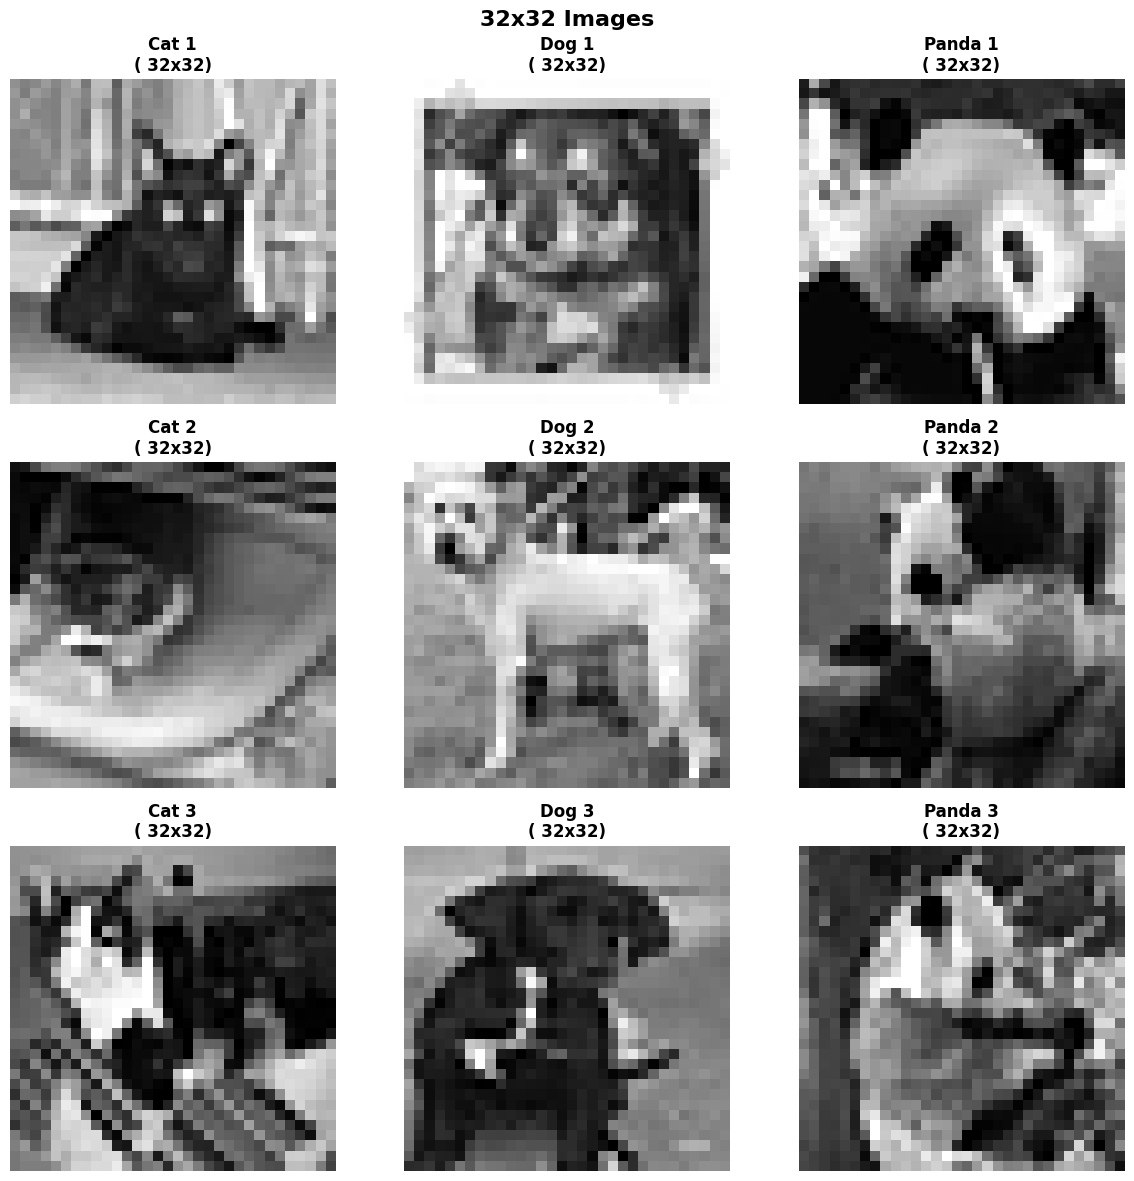

In [3]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

print("Displaying 32x32 resized images...")

display_images_by_class = [[], [], []]

for class_idx, class_name in enumerate(class_names):
    class_path = f'/content/animal_dataset/{class_name}'
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

    for img_file in image_files[:3]:
        try:
            img_path = os.path.join(class_path, img_file)

            img = Image.open(img_path)

            if img.mode != 'RGB':
                img = img.convert('RGB')

            img = img.filter(ImageFilter.GaussianBlur(radius=0.5))

            original_size = img.size
            if max(original_size) > 128:
                if original_size[0] > original_size[1]:
                    intermediate_size = (128, int(128 * original_size[1] / original_size[0]))
                else:
                    intermediate_size = (int(128 * original_size[0] / original_size[1]), 128)
                img = img.resize(intermediate_size, Image.LANCZOS)

            img_gray = img.convert('L')
            img_resized = img_gray.resize((32, 32), Image.LANCZOS)

            img_final = img_resized.filter(ImageFilter.UnsharpMask(radius=0.5, percent=120, threshold=1))

            display_images_by_class[class_idx].append(np.array(img_final))

        except Exception as e:
            print(f"Error processing {img_file}: {e}")

for class_idx in range(3):
    for sample_idx in range(3):
        if sample_idx < len(display_images_by_class[class_idx]):
            img_data = display_images_by_class[class_idx][sample_idx]

            axes[sample_idx, class_idx].imshow(img_data, cmap='gray', interpolation='nearest')
            axes[sample_idx, class_idx].set_title(
                f'{class_names[class_idx].capitalize()} {sample_idx+1}\n( 32x32)',
                fontsize=12, fontweight='bold'
            )
            axes[sample_idx, class_idx].axis('off')

            for spine in axes[sample_idx, class_idx].spines.values():
                spine.set_edgecolor('gray')
                spine.set_linewidth(1)
        else:
            axes[sample_idx, class_idx].axis('off')

plt.suptitle('32x32 Images', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [4]:

def manhattan_distance(img1, img2):
    total = 0
    for i in range(1024):
        total += abs(img1[i] - img2[i])
    return total

def euclidean_distance(img1, img2):
    total = 0
    for i in range(1024):
        diff = img1[i] - img2[i]
        total += diff * diff
    return total ** 0.5

def predict_class(train_images, train_labels, test_image, k, distance_func):
    distances = []

    for i in range(len(train_images)):
        dist = distance_func(test_image, train_images[i])
        distances.append([dist, train_labels[i]])

    distances.sort()

    votes = [0, 0, 0]
    for i in range(k):
        neighbor_class = distances[i][1]
        votes[neighbor_class] += 1

    if votes[0] >= votes[1] and votes[0] >= votes[2]:
        return 0
    elif votes[1] >= votes[2]:
        return 1
    else:
        return 2


In [5]:
def create_stratified_folds(images, labels, n_folds=5):
    class_indices = {0: [], 1: [], 2: []}
    for idx, label in enumerate(labels):
        class_indices[label].append(idx)

    np.random.seed(42)
    for class_label in class_indices:
        np.random.shuffle(class_indices[class_label])

    folds = []
    for fold in range(n_folds):
        test_indices = []
        train_indices = []

        for class_label in class_indices:
            class_size = len(class_indices[class_label])
            fold_size = class_size // n_folds

            start_idx = fold * fold_size
            if fold == n_folds - 1:
                end_idx = class_size
            else:
                end_idx = (fold + 1) * fold_size

            test_indices.extend(class_indices[class_label][start_idx:end_idx])

            train_indices.extend(class_indices[class_label][:start_idx])
            train_indices.extend(class_indices[class_label][end_idx:])

        folds.append((train_indices, test_indices))

    return folds

def do_cross_validation(images, labels, k_values):
    folds = create_stratified_folds(images, labels, 5)

    results = {}
    for k in k_values:
        results[k] = {'manhattan': [], 'euclidean': []}

    print("Starting stratified 5-fold cross-validation...")

    for fold_num, (train_indices, test_indices) in enumerate(folds):
        print(f"\nFold {fold_num + 1}/5")

        train_images = [images[i] for i in train_indices]
        train_labels = [labels[i] for i in train_indices]
        test_images = [images[i] for i in test_indices]
        test_labels = [labels[i] for i in test_indices]

        train_class_counts = [sum(1 for l in train_labels if l == c) for c in range(3)]
        test_class_counts = [sum(1 for l in test_labels if l == c) for c in range(3)]

        print(f"  Train samples: {len(train_images)} (Cat:{train_class_counts[0]}, Dog:{train_class_counts[1]}, Panda:{train_class_counts[2]})")
        print(f"  Test samples: {len(test_images)} (Cat:{test_class_counts[0]}, Dog:{test_class_counts[1]}, Panda:{test_class_counts[2]})")

        for k in k_values:
            print(f"  Testing k={k}...")

            correct_manhattan = 0
            for i in range(len(test_images)):
                predicted = predict_class(train_images, train_labels, test_images[i], k, manhattan_distance)
                if predicted == test_labels[i]:
                    correct_manhattan += 1

            accuracy_manhattan = correct_manhattan / len(test_images)
            results[k]['manhattan'].append(accuracy_manhattan)
            print(f"    Manhattan accuracy: {accuracy_manhattan:.3f}")

            correct_euclidean = 0
            for i in range(len(test_images)):
                predicted = predict_class(train_images, train_labels, test_images[i], k, euclidean_distance)
                if predicted == test_labels[i]:
                    correct_euclidean += 1

            accuracy_euclidean = correct_euclidean / len(test_images)
            results[k]['euclidean'].append(accuracy_euclidean)
            print(f"    Euclidean accuracy: {accuracy_euclidean:.3f}")

    return results

k_list = [1, 3, 5, 7, 9, 11, 13, 15]
print("Running stratified 5-fold cross-validation...")
cv_results = do_cross_validation(images, labels, k_list)
print("\nCross-validation completed!")


Running stratified 5-fold cross-validation...
Starting stratified 5-fold cross-validation...

Fold 1/5
  Train samples: 240 (Cat:80, Dog:80, Panda:80)
  Test samples: 60 (Cat:20, Dog:20, Panda:20)
  Testing k=1...
    Manhattan accuracy: 0.483
    Euclidean accuracy: 0.483
  Testing k=3...
    Manhattan accuracy: 0.350
    Euclidean accuracy: 0.350
  Testing k=5...
    Manhattan accuracy: 0.367
    Euclidean accuracy: 0.367
  Testing k=7...
    Manhattan accuracy: 0.450
    Euclidean accuracy: 0.450
  Testing k=9...
    Manhattan accuracy: 0.467
    Euclidean accuracy: 0.467
  Testing k=11...
    Manhattan accuracy: 0.467
    Euclidean accuracy: 0.467
  Testing k=13...
    Manhattan accuracy: 0.467
    Euclidean accuracy: 0.467
  Testing k=15...
    Manhattan accuracy: 0.433
    Euclidean accuracy: 0.483

Fold 2/5
  Train samples: 240 (Cat:80, Dog:80, Panda:80)
  Test samples: 60 (Cat:20, Dog:20, Panda:20)
  Testing k=1...
    Manhattan accuracy: 0.400
    Euclidean accuracy: 0.450
  T


Calculating results...

DETAILED RESULTS:
K   Manhattan Avg   Manhattan Std   Euclidean Avg   Euclidean Std  
----------------------------------------------------------------------
1   0.473           0.040           0.460           0.029
3   0.410           0.050           0.380           0.051
5   0.423           0.073           0.393           0.050
7   0.443           0.031           0.413           0.067
9   0.457           0.059           0.417           0.041
11  0.460           0.062           0.440           0.072
13  0.480           0.055           0.437           0.084
15  0.477           0.068           0.443           0.058


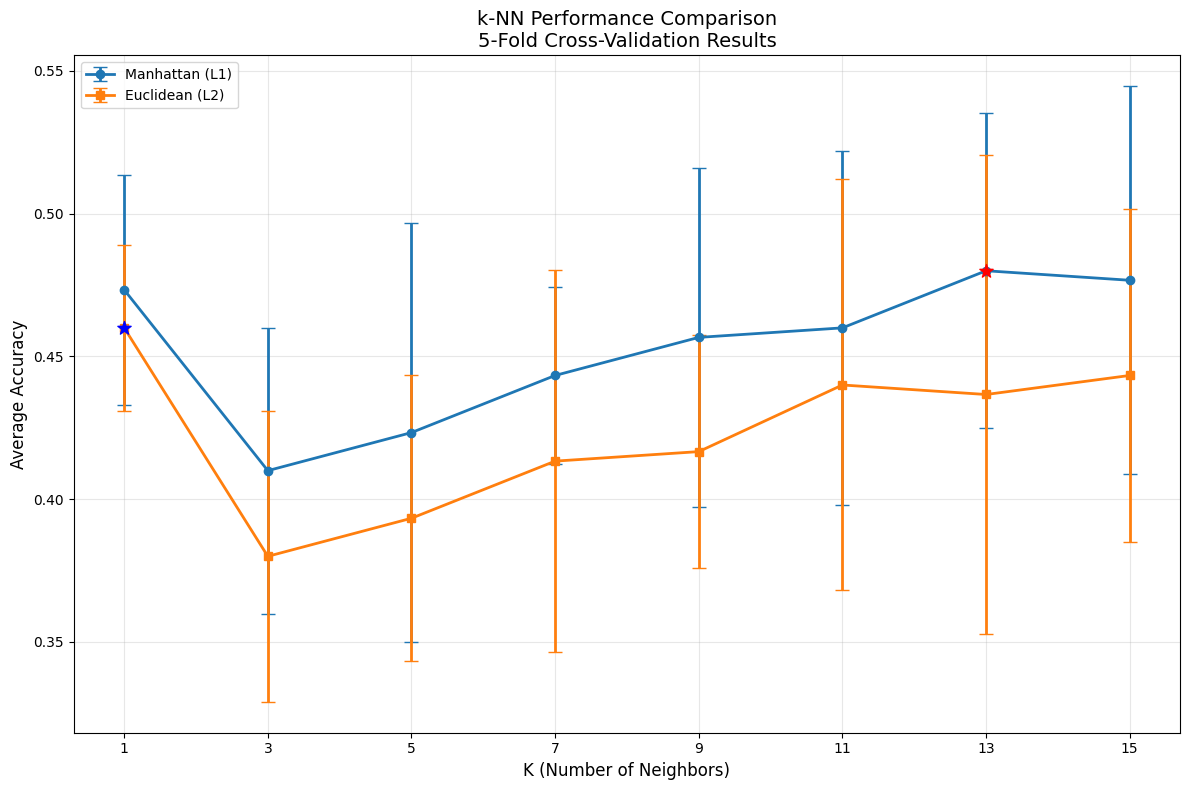


SUMMARY:
Best Manhattan Performance: 0.480 at K=13
Best Euclidean Performance: 0.460 at K=1

OVERALL WINNER: Manhattan Distance
Performance advantage: 0.020
Recommended configuration: Manhattan distance with K=13

VALUES FOR DISCUSSION SECTION
Winning Distance Metric: Manhattan (L1)
Losing Distance Metric: Euclidean (L2)
Winning Peak Accuracy: 0.480
Losing Peak Accuracy: 0.460
Winning Optimal K: 13
Losing Optimal K: 1
Performance Advantage: 0.020
Manhattan Overall Average: 0.453
Euclidean Overall Average: 0.423
K-value Trend: varying (increasing for Manhattan, decreasing for Euclidean)
Dataset Size: 300 images
Image Resolution: 32×32 pixels (1024 features)
Number of Classes: 3
Class Distribution: {'cat': 100, 'dog': 100, 'panda': 100}

PERFORMANCE BREAKDOWN BY K:
--------------------------------------------------
K   Manhattan    Euclidean    Difference   Winner
--------------------------------------------------
1   0.473        0.460        0.013        Manhattan
3   0.410        0.3

In [6]:
print("\nCalculating results...")

manhattan_avgs = []
manhattan_stds = []
euclidean_avgs = []
euclidean_stds = []

print("\nDETAILED RESULTS:")
print("="*70)
print(f"{'K':<3} {'Manhattan Avg':<15} {'Manhattan Std':<15} {'Euclidean Avg':<15} {'Euclidean Std':<15}")
print("-"*70)

for k in k_list:
    manhattan_scores = cv_results[k]['manhattan']
    manhattan_avg = sum(manhattan_scores) / len(manhattan_scores)
    manhattan_std = (sum((x - manhattan_avg)**2 for x in manhattan_scores) / len(manhattan_scores)) ** 0.5

    manhattan_avgs.append(manhattan_avg)
    manhattan_stds.append(manhattan_std)

    euclidean_scores = cv_results[k]['euclidean']
    euclidean_avg = sum(euclidean_scores) / len(euclidean_scores)
    euclidean_std = (sum((x - euclidean_avg)**2 for x in euclidean_scores) / len(euclidean_scores)) ** 0.5

    euclidean_avgs.append(euclidean_avg)
    euclidean_stds.append(euclidean_std)

    print(f"{k:<3} {manhattan_avg:.3f}           {manhattan_std:.3f}           {euclidean_avg:.3f}           {euclidean_std:.3f}")

print("="*70)

plt.figure(figsize=(12, 8))

plt.errorbar(k_list, manhattan_avgs, yerr=manhattan_stds,
            label='Manhattan (L1)', marker='o', linewidth=2, markersize=6, capsize=5)
plt.errorbar(k_list, euclidean_avgs, yerr=euclidean_stds,
            label='Euclidean (L2)', marker='s', linewidth=2, markersize=6, capsize=5)

plt.xlabel('K (Number of Neighbors)', fontsize=12)
plt.ylabel('Average Accuracy', fontsize=12)
plt.title('k-NN Performance Comparison\n5-Fold Cross-Validation Results', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(k_list)

best_manhattan_idx = manhattan_avgs.index(max(manhattan_avgs))
best_euclidean_idx = euclidean_avgs.index(max(euclidean_avgs))

plt.scatter(k_list[best_manhattan_idx], manhattan_avgs[best_manhattan_idx],
           s=100, color='red', marker='*', zorder=5)
plt.scatter(k_list[best_euclidean_idx], euclidean_avgs[best_euclidean_idx],
           s=100, color='blue', marker='*', zorder=5)

plt.tight_layout()
plt.show()

best_manhattan = max(manhattan_avgs)
best_euclidean = max(euclidean_avgs)
best_manhattan_k = k_list[best_manhattan_idx]
best_euclidean_k = k_list[best_euclidean_idx]

print(f"\nSUMMARY:")
print("="*50)
print(f"Best Manhattan Performance: {best_manhattan:.3f} at K={best_manhattan_k}")
print(f"Best Euclidean Performance: {best_euclidean:.3f} at K={best_euclidean_k}")

if best_manhattan > best_euclidean:
    print(f"\nOVERALL WINNER: Manhattan Distance")
    print(f"Performance advantage: {best_manhattan - best_euclidean:.3f}")
    overall_winner = "Manhattan"
    winner_k = best_manhattan_k
    winning_accuracy = best_manhattan
    losing_accuracy = best_euclidean
else:
    print(f"\nOVERALL WINNER: Euclidean Distance")
    print(f"Performance advantage: {best_euclidean - best_manhattan:.3f}")
    overall_winner = "Euclidean"
    winner_k = best_euclidean_k
    winning_accuracy = best_euclidean
    losing_accuracy = best_manhattan

print(f"Recommended configuration: {overall_winner} distance with K={winner_k}")
print("="*50)

print("\n" + "="*60)
print("VALUES FOR DISCUSSION SECTION")
print("="*60)

manhattan_overall_avg = sum(manhattan_avgs) / len(manhattan_avgs)
euclidean_overall_avg = sum(euclidean_avgs) / len(euclidean_avgs)
performance_advantage = abs(winning_accuracy - losing_accuracy)

if manhattan_avgs[-1] > manhattan_avgs[0]:
    manhattan_trend = "increasing"
elif manhattan_avgs[-1] < manhattan_avgs[0]:
    manhattan_trend = "decreasing"
else:
    manhattan_trend = "stabilizing"

if euclidean_avgs[-1] > euclidean_avgs[0]:
    euclidean_trend = "increasing"
elif euclidean_avgs[-1] < euclidean_avgs[0]:
    euclidean_trend = "decreasing"
else:
    euclidean_trend = "stabilizing"

if manhattan_trend == euclidean_trend:
    k_trend = manhattan_trend
else:
    k_trend = f"varying ({manhattan_trend} for Manhattan, {euclidean_trend} for Euclidean)"

n_total = len(images)
n_features = images.shape[1]
sqrt_features = int(n_features ** 0.5)

class_counts = {}
for i, class_name in enumerate(class_names):
    count = sum(1 for label in labels if label == i)
    class_counts[class_name] = count

print(f"Winning Distance Metric: {overall_winner} (L1)" if overall_winner == "Manhattan" else f"Winning Distance Metric: {overall_winner} (L2)")
print(f"Losing Distance Metric: {'Euclidean (L2)' if overall_winner == 'Manhattan' else 'Manhattan (L1)'}")
print(f"Winning Peak Accuracy: {winning_accuracy:.3f}")
print(f"Losing Peak Accuracy: {losing_accuracy:.3f}")
print(f"Winning Optimal K: {winner_k}")
print(f"Losing Optimal K: {best_euclidean_k if overall_winner == 'Manhattan' else best_manhattan_k}")
print(f"Performance Advantage: {performance_advantage:.3f}")
print(f"Manhattan Overall Average: {manhattan_overall_avg:.3f}")
print(f"Euclidean Overall Average: {euclidean_overall_avg:.3f}")
print(f"K-value Trend: {k_trend}")
print(f"Dataset Size: {n_total} images")
print(f"Image Resolution: {sqrt_features}×{sqrt_features} pixels ({n_features} features)")
print(f"Number of Classes: {len(class_names)}")
print(f"Class Distribution: {class_counts}")

print(f"\nPERFORMANCE BREAKDOWN BY K:")
print("-" * 50)
print(f"{'K':<3} {'Manhattan':<12} {'Euclidean':<12} {'Difference':<12} {'Winner'}")
print("-" * 50)

for i, k in enumerate(k_list):
    manhattan_acc = manhattan_avgs[i]
    euclidean_acc = euclidean_avgs[i]
    difference = abs(manhattan_acc - euclidean_acc)
    winner = "Manhattan" if manhattan_acc > euclidean_acc else "Euclidean"

    print(f"{k:<3} {manhattan_acc:.3f}        {euclidean_acc:.3f}        {difference:.3f}        {winner}")

manhattan_range = max(manhattan_avgs) - min(manhattan_avgs)
euclidean_range = max(euclidean_avgs) - min(euclidean_avgs)
more_consistent = "Manhattan" if manhattan_range < euclidean_range else "Euclidean"

print(f"\nCONSISTENCY ANALYSIS:")
print(f"Manhattan performance range: {manhattan_range:.3f}")
print(f"Euclidean performance range: {euclidean_range:.3f}")
print(f"More consistent metric: {more_consistent}")

print("="*60)


Creating final model with Manhattan distance and K=13
Training set: 240 images
Test set: 60 images
Making predictions on all test samples...

Found top 5 most confident predictions:
  1. Confidence: 0.769 - dog (Wrong)
  2. Confidence: 0.692 - cat (Wrong)
  3. Confidence: 0.692 - dog (Wrong)
  4. Confidence: 0.692 - cat (Correct)
  5. Confidence: 0.692 - panda (Correct)


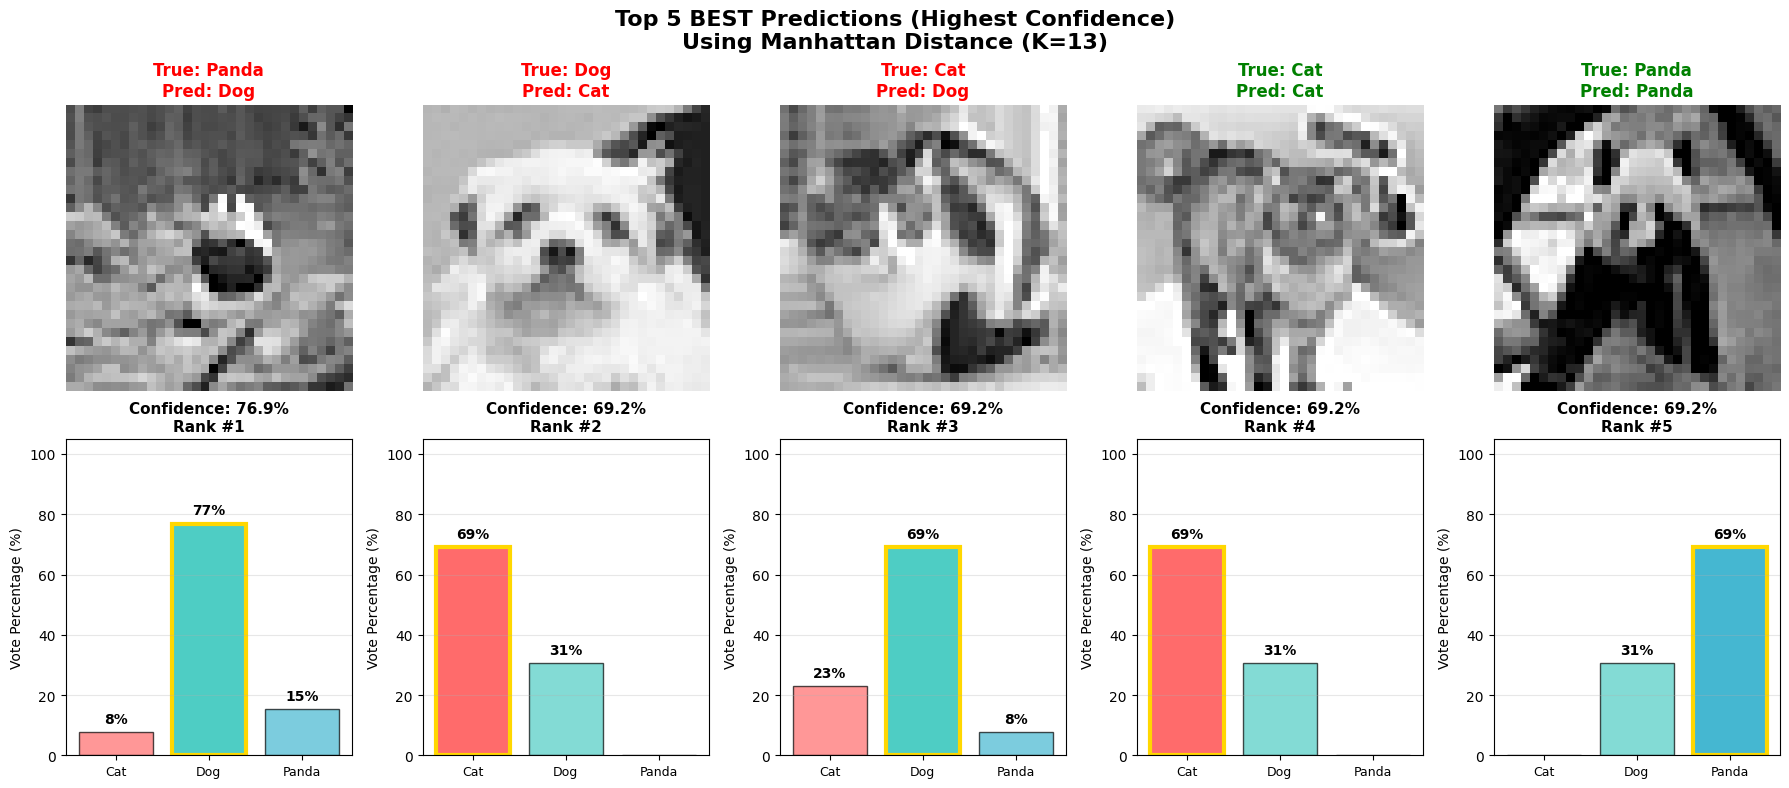


FINAL MODEL PERFORMANCE:
Test Accuracy: 0.450 (45.0%)
Configuration: Manhattan Distance, K=13
Correct predictions: 27/60

CONFIDENCE STATISTICS:
----------------------------------------
Average confidence: 0.546
Avg confidence (correct): 0.550
Avg confidence (incorrect): 0.543

TOP 5 BEST PREDICTIONS SUMMARY:
--------------------------------------------------
Correct in top 5: 2/5 (40%)
#1: Panda->Dog (Conf: 0.769)
#2: Dog->Cat (Conf: 0.692)
#3: Cat->Dog (Conf: 0.692)
#4: Cat->Cat (Conf: 0.692)
#5: Panda->Panda (Conf: 0.692)


In [7]:
print(f"Creating final model with {overall_winner} distance and K={winner_k}")

if overall_winner == "Manhattan":
    best_distance_func = manhattan_distance
else:
    best_distance_func = euclidean_distance

def predict_class_with_confidence(train_images, train_labels, test_image, k, distance_func):
    distances = []

    for i in range(len(train_images)):
        dist = distance_func(test_image, train_images[i])
        distances.append([dist, train_labels[i]])

    distances.sort()

    votes = [0, 0, 0]
    for i in range(k):
        neighbor_class = distances[i][1]
        votes[neighbor_class] += 1

    predicted_class = votes.index(max(votes))
    confidence = max(votes) / k

    probabilities = [vote / k for vote in votes]

    return predicted_class, confidence, probabilities

n_total = len(images)
train_size = int(0.8 * n_total)

train_images = [images[i] for i in range(train_size)]
train_labels = [labels[i] for i in range(train_size)]
test_images = [images[i] for i in range(train_size, n_total)]
test_labels = [labels[i] for i in range(train_size, n_total)]

print(f"Training set: {len(train_images)} images")
print(f"Test set: {len(test_images)} images")

print("Making predictions on all test samples...")
all_predictions = []

for i, test_img in enumerate(test_images):
    pred, conf, probs = predict_class_with_confidence(train_images, train_labels, test_img, winner_k, best_distance_func)

    all_predictions.append({
        'index': i,
        'true_label': test_labels[i],
        'predicted_label': pred,
        'confidence': conf,
        'probabilities': probs,
        'is_correct': test_labels[i] == pred
    })

top_5_predictions = sorted(all_predictions, key=lambda x: x['confidence'], reverse=True)[:5]

print(f"\nFound top 5 most confident predictions:")
for i, pred in enumerate(top_5_predictions):
    status = "Correct" if pred['is_correct'] else "Wrong"
    print(f"  {i+1}. Confidence: {pred['confidence']:.3f} - {class_names[pred['predicted_label']]} ({status})")

fig = plt.figure(figsize=(18, 8))
class_names = ['Cat', 'Dog', 'Panda']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i, pred_data in enumerate(top_5_predictions):
    ax_img = plt.subplot(2, 5, i+1)

    test_idx = pred_data['index']

    if 'images_display' in globals():
        display_img = images_display[train_size + test_idx].reshape(32, 32)
    else:
        reconstructed = images[train_size + test_idx].reshape(32, 32)
        display_img = (reconstructed - reconstructed.min()) / (reconstructed.max() - reconstructed.min())

    true_label = pred_data['true_label']
    pred_label = pred_data['predicted_label']
    confidence = pred_data['confidence']
    class_probs = pred_data['probabilities']
    is_correct = pred_data['is_correct']

    ax_img.imshow(display_img, cmap='gray', interpolation='nearest')

    title_color = 'green' if is_correct else 'red'
    ax_img.set_title(f'True: {class_names[true_label]}\nPred: {class_names[pred_label]}',
                     fontsize=12, fontweight='bold', color=title_color)
    ax_img.axis('off')

    border_color = 'green' if is_correct else 'red'
    for spine in ax_img.spines.values():
        spine.set_visible(True)
        spine.set_edgecolor(border_color)
        spine.set_linewidth(4)

    ax_conf = plt.subplot(2, 5, i+6)

    bars = ax_conf.bar(range(3), [prob * 100 for prob in class_probs],
                       color=colors, alpha=0.7, edgecolor='black', linewidth=1)

    bars[pred_label].set_alpha(1.0)
    bars[pred_label].set_edgecolor('gold')
    bars[pred_label].set_linewidth(3)

    for j, (bar, prob) in enumerate(zip(bars, class_probs)):
        height = bar.get_height()
        if prob > 0:
            ax_conf.text(bar.get_x() + bar.get_width()/2., height + 2,
                         f'{prob*100:.0f}%', ha='center', va='bottom',
                         fontweight='bold', fontsize=10)

    ax_conf.set_ylim(0, 105)
    ax_conf.set_ylabel('Vote Percentage (%)', fontsize=10)
    ax_conf.set_title(f'Confidence: {confidence*100:.1f}%\nRank #{i+1}',
                      fontsize=11, fontweight='bold')
    ax_conf.set_xticks(range(3))
    ax_conf.set_xticklabels(class_names, fontsize=9)
    ax_conf.grid(True, alpha=0.3, axis='y')

plt.suptitle(f'Top 5 BEST Predictions (Highest Confidence)\nUsing {overall_winner} Distance (K={winner_k})',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

all_correct = sum(1 for pred in all_predictions if pred['is_correct'])
test_accuracy = all_correct / len(all_predictions)

print(f"\nFINAL MODEL PERFORMANCE:")
print("="*60)
print(f"Test Accuracy: {test_accuracy:.3f} ({test_accuracy*100:.1f}%)")
print(f"Configuration: {overall_winner} Distance, K={winner_k}")
print(f"Correct predictions: {all_correct}/{len(all_predictions)}")
print("="*60)

confidences = [pred['confidence'] for pred in all_predictions]
correct_confidences = [pred['confidence'] for pred in all_predictions if pred['is_correct']]
incorrect_confidences = [pred['confidence'] for pred in all_predictions if not pred['is_correct']]

print(f"\nCONFIDENCE STATISTICS:")
print("-"*40)
print(f"Average confidence: {sum(confidences)/len(confidences):.3f}")
if correct_confidences:
    print(f"Avg confidence (correct): {sum(correct_confidences)/len(correct_confidences):.3f}")
if incorrect_confidences:
    print(f"Avg confidence (incorrect): {sum(incorrect_confidences)/len(incorrect_confidences):.3f}")

print(f"\nTOP 5 BEST PREDICTIONS SUMMARY:")
print("-"*50)
top_5_correct = sum(1 for pred in top_5_predictions if pred['is_correct'])
print(f"Correct in top 5: {top_5_correct}/5 ({top_5_correct/5*100:.0f}%)")

for i, pred in enumerate(top_5_predictions):
    true_class = class_names[pred['true_label']]
    pred_class = class_names[pred['predicted_label']]
    conf = pred['confidence']

    print(f"#{i+1}: {true_class}->{pred_class} (Conf: {conf:.3f})")

print("="*60)

